In [1]:
import pandas as pd

In [6]:
df=pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_4251154.csv', skiprows=4)

In [7]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,107195.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,694665117.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,39835428.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,470898870.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,33933611.0,NaN


In [8]:
dataset= df[df['Country Name']== 'World']

In [9]:
dataset.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
259,World,WLD,"Population, total",SP.POP.TOTL,3.032156e+09,3.071596e+09,3.124561e+09,3.189656e+09,3.255146e+09,3.322047e+09,...,7.175500e+09,7.261847e+09,7.347679e+09,7.433651e+09,7.519371e+09,7.602716e+09,7.683806e+09,7.763933e+09,7.836631e+09,NaN


In [10]:
df.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2018              float64
2019              float64
2020              float64
2021              float64
Unnamed: 66       float64
Length: 67, dtype: object

In [11]:
dataset = dataset.drop(['Country Name', 'Country Code','Indicator Name','Indicator Code'], axis='columns')

In [12]:
dataset

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
259,3.032156e+09,3.071596e+09,3.124561e+09,3.189656e+09,3.255146e+09,3.322047e+09,3.392098e+09,3.461620e+09,3.532783e+09,3.606554e+09,...,7.175500e+09,7.261847e+09,7.347679e+09,7.433651e+09,7.519371e+09,7.602716e+09,7.683806e+09,7.763933e+09,7.836631e+09,NaN


Dropping the unnamed column

In [14]:
dataset = dataset.dropna(how='all', axis='columns')

transposing years into columns

In [15]:
dataset=dataset.transpose()

In [16]:
dataset.head()

,259
1960,3.032156e+09
1961,3.071596e+09
1962,3.124561e+09
1963,3.189656e+09
1964,3.255146e+09


renaming column

In [19]:
dataset= dataset.rename(columns={259:'World Population'})

In [20]:
dataset

,World Population
1960,3.032156e+09
1961,3.071596e+09
1962,3.124561e+09
1963,3.189656e+09
1964,3.255146e+09
...,...
2017,7.519371e+09
2018,7.602716e+09
2019,7.683806e+09
2020,7.763933e+09


viz plot

In [22]:
import matplotlib.pyplot as plt

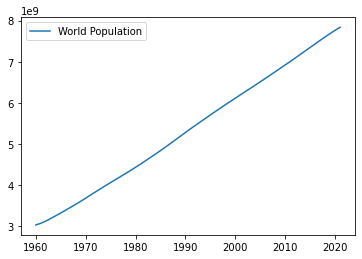

In [23]:
dataset.plot()
plt.show()

calculate yearly percentage change

In [24]:
dataset['Year growth'] = dataset['World Population'].pct_change()

In [25]:
dataset.head()

,World Population,Year growth
1960,3.032156e+09,NaN
1961,3.071596e+09,0.013007
1962,3.124561e+09,0.017243
1963,3.189656e+09,0.020833
1964,3.255146e+09,0.020532


viz of yearly growth

<AxesSubplot:>

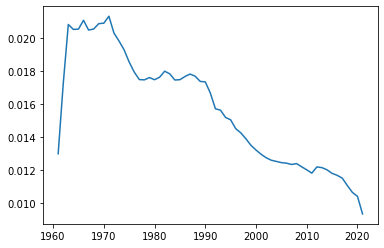

In [28]:
dataset['Year growth'].plot()

In [29]:
dataset['Smooth']= dataset['Year growth'].rolling(10).mean()

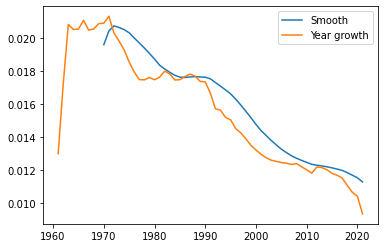

In [31]:
dataset[['Smooth','Year growth']].plot()
plt.show()

Transform data

In [32]:
dataset[['Smooth','Year growth']] *=100

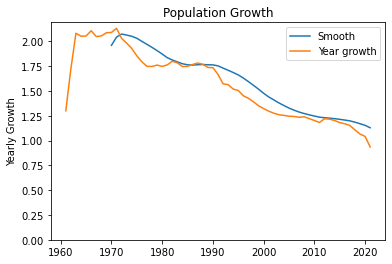

In [37]:
dataset[['Smooth','Year growth']].plot(ylabel='Yearly Growth', title='Population Growth',ylim=0)
plt.show()